## dataset functions

In [1]:
# dataset = "exp_density"
# from exp_density_polynomial import *
# dataset = "cvar"
# from cvar import *
# dataset = "energy"
# from energy import *
dataset = "kelly"
from kelly import *
# dataset = "news_vendor"
# from news_vendor import *

device = cpu


## osmm

In [2]:
from osmm import OSMM

## generate random data

In [3]:
W = generate_random_data()
W_validation = generate_random_data()
init_val = get_initial_val()

## solve

In [4]:
osmm_prob = OSMM(f_torch=my_objf_torch, g_cvxpy=get_cvxpy_description)
osmm_prob.solve(W, init_val, solver="MOSEK", eps_gap_abs=1e-4) #W_validate=W_validation,

Hutchinson #iters 36 rel. incr. 0.0007766506225867391 est. tr. 12865.70227263578
lam_0 73.10058109452149 Hutchinson time cost,  0.12491226196289062


/Users/xinyueshen/anaconda3/lib/python3.7/site-packages/cvxpy/reductions/solvers/solving_chain.py:163: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Discplined Parametrized Programming, at
	https://www.cvxpy.org/tutorial/advanced/index.html#disciplined-parametrized-programming
  warnings.warn(dpp_error_msg)


iter= 10 objf_k+1= 0.2755275070667267 L_k+1= -0.17230006980176849 lam_k+1= 8.74874467334739 tk= 0.125 mu_k+1 0.9977431552000007 ||G_k+1||_F= 175.6850571477525 tau_k+1 8.768533893468483
iter= 20 objf_k+1= 0.002871820004656911 L_k+1= -0.10356494299752628 lam_k+1= 1.3369202751608669 tk= 1.0 mu_k+1 0.10713185553479643 ||G_k+1||_F= 209.58720838149796 tau_k+1 12.47920395373564
iter= 30 objf_k+1= -0.017573686316609383 L_k+1= -0.10356494299752628 lam_k+1= 0.9785915650054262 tk= 1.0 mu_k+1 0.02174822879753572 ||G_k+1||_F= 397.97896581161024 tau_k+1 44.99637989445421
iter= 40 objf_k+1= -0.018703864887356758 L_k+1= -0.10356494299752628 lam_k+1= 0.2827280288889379 tk= 0.25 mu_k+1 0.006070603356206806 ||G_k+1||_F= 404.8925963857283 tau_k+1 46.57329960453872
iter= 50 objf_k+1= -0.01942291110754013 L_k+1= -0.04191380041999082 lam_k+1= 0.260530820300434 tk= 1.0 mu_k+1 0.006056902946589493 ||G_k+1||_F= 389.1128542040113 tau_k+1 43.01386741670231
iter= 60 objf_k+1= -0.019423317164182663 L_k+1= -0.024129

## get results

In [5]:
x_soln = osmm_prob.method_results["soln"]
Xs = osmm_prob.method_results["var_iters"]

In [6]:
max_num_rounds = len(osmm_prob.method_results["objf_iters"])
iters_taken = osmm_prob.method_results["iters_taken"]

In [7]:
objfs = np.array(osmm_prob.method_results["objf_iters"])
for i in range(1, iters_taken):
    objfs[i] = np.min(osmm_prob.method_results["objf_iters"][0:i + 1])
objfs[iters_taken::] = objfs[iters_taken]
objf_min = np.min(objfs[0:iters_taken + 1])

In [8]:
objfs_val = np.array(osmm_prob.method_results["objf_validation_iters"])
objfs_val[iters_taken::] = objfs_val[iters_taken]

In [9]:
lower_bounds = np.array(osmm_prob.method_results["lower_bound_iters"])
lower_bounds[iters_taken::] = lower_bounds[iters_taken]

In [10]:
opt_res_norms = np.array(osmm_prob.method_results["opt_res_iters"])
start_idx = 1
for i in range(start_idx, iters_taken):
    opt_res_norms[i] = np.min(osmm_prob.method_results["opt_res_iters"][start_idx:i + 1])
opt_res_norms[iters_taken::] = opt_res_norms[iters_taken]

## plots

/Users/xinyueshen/Documents/research/osmm/examples/kelly.py:197: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  a.stem([i for i in range(n - 1)], outcomes_count[0:n - 1] / N, markerfmt=' ')
/Users/xinyueshen/Documents/research/osmm/examples/kelly.py:209: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  b.stem([i for i in range(n)], x_best, markerfmt=' ')


mean 0.01942334041874258


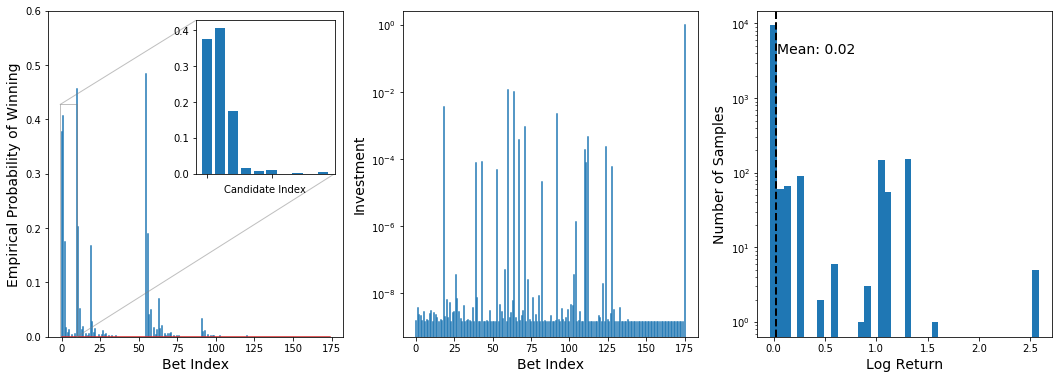

In [11]:
if dataset == "exp_density":
    my_plot_exp_density_one_result(Xs, objfs, iters_taken)
else:
    my_plot_one_result(W, x_soln, is_save_fig=False, figname="cvar_pnt9_result.pdf")

In [12]:
linewidth = 2
fontsize = 16
font = {'family': 'serif',
        'size': fontsize,
        }

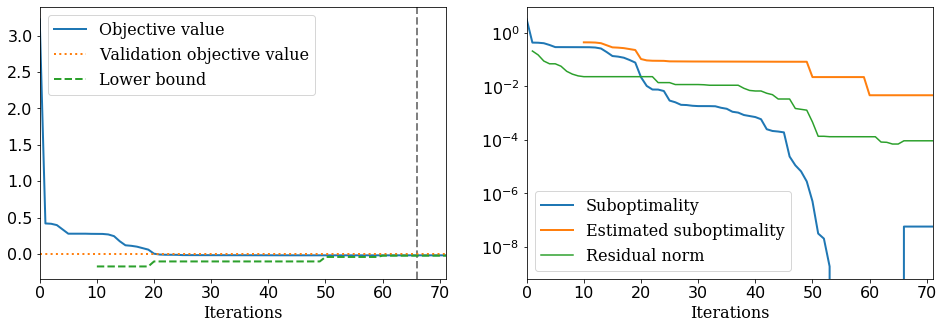

In [13]:
fig = plt.figure(tight_layout=False, figsize=(16, 5))
gs = gridspec.GridSpec(1, 2)
plt.rcParams.update({'font.size': fontsize})

plot1 = fig.add_subplot(gs[0, 0])
rounds = range(0, max_num_rounds)
if osmm_prob.method_results["iters_taken"] < max_num_rounds:
    plot1.axvline(osmm_prob.method_results["iters_taken"], color='gray', linestyle='dashed', linewidth=linewidth)
##objf
plot1.plot(np.array(rounds), objfs, linewidth=linewidth, label="Objective value")
##objf_validation
plot1.plot(np.array(rounds), objfs_val, ':', linewidth=linewidth, label="Validation objective value")
##l_k
plot1.plot(np.array(rounds), lower_bounds, '--', linewidth=linewidth, label="Lower bound")

plot1.set_xlabel("Iterations", fontdict=font)
plot1.legend(prop=font)

#=========================================================================================================
plot2 = fig.add_subplot(gs[0, 1])
##subopt
plot2.plot(np.array(rounds), objfs - objf_min, linewidth=linewidth, label="Suboptimality")
## gaps
gaps = objfs - lower_bounds
plot2.plot(rounds, gaps, linewidth=linewidth, label="Estimated suboptimality")
## residual norm
plot2.plot(rounds[start_idx::], opt_res_norms[start_idx::] / n, label="Residual norm", color='#2ca02c')

plot2.set_xlabel("Iterations", fontdict=font)
plot2.set_yscale("log")
plot2.legend(prop=font)

plot_iter_lim = iters_taken + 5
ylim = None
if plot_iter_lim is not None:
    plot1.set_xlim([0, plot_iter_lim])
    plot2.set_xlim([0, plot_iter_lim])
if ylim is not None:
    plot2.set_ylim([ylim[0], ylim[1]])

In [14]:
print(osmm_prob.method_results["soln_additional_vars"])

[]
